# Guided Project: Profitable App Profiles for the App Store and Google Play Markets

This notebook is doing a DataQuest guided project, using Pandas instead of elementary Python

In [1]:
%pip freeze

anyio==4.1.0
appnope==0.1.3
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
arrow==1.3.0
asttokens==2.4.1
async-lru==2.0.4
attrs==23.1.0
Babel==2.13.1
beautifulsoup4==4.12.2
bleach==6.1.0
certifi==2023.11.17
cffi==1.16.0
charset-normalizer==3.3.2
comm==0.2.0
contourpy==1.2.0
cycler==0.12.1
debugpy==1.8.0
decorator==5.1.1
defusedxml==0.7.1
exceptiongroup==1.2.0
executing==2.0.1
fastjsonschema==2.19.0
fonttools==4.46.0
fqdn==1.5.1
idna==3.6
importlib-metadata==7.0.0
importlib-resources==6.1.1
ipykernel==6.27.1
ipython==8.18.1
ipywidgets==8.1.1
isoduration==20.11.0
jedi==0.19.1
Jinja2==3.1.2
joblib==1.3.2
json5==0.9.14
jsonpointer==2.4
jsonschema==4.20.0
jsonschema-specifications==2023.11.2
jupyter==1.0.0
jupyter-console==6.6.3
jupyter-events==0.9.0
jupyter-lsp==2.2.1
jupyter_client==8.6.0
jupyter_core==5.5.0
jupyter_server==2.12.1
jupyter_server_terminals==0.4.4
jupyterlab==4.0.9
jupyterlab-widgets==3.0.9
jupyterlab_pygments==0.3.0
jupyterlab_server==2.25.2
kiwisolver==1.4.5
MarkupSafe=

In [2]:
import pandas as pd
from pathlib import Path

In [3]:
data_path = Path.home() / "datasets" / "tabular_practice"

df_apple = pd.read_csv(data_path / "AppleStore.csv")
df_android = pd.read_csv(data_path / "googleplaystore.csv")

df_apple.head()


,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [4]:
df_android.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


## Data Cleaning

We do the following:

* Remove one erroneous row
* Filter out duplicates entries for apps. We keep the entry with the largest number of reviews (most recent one)
* Remove apps whose name contain more than 3 non-ascii characters
* Remove apps which are not free

In [5]:
# This row is invalid, should be removed

df_android.iloc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              1.9
Rating                                               19.0
Reviews                                              3.0M
Size                                               1,000+
Installs                                             Free
Type                                                    0
Price                                            Everyone
Content Rating                                        NaN
Genres                                  February 11, 2018
Last Updated                                       1.0.19
Current Ver                                    4.0 and up
Android Ver                                           NaN
Name: 10472, dtype: object

In [6]:
df_android.drop(10472, inplace=True)
df_android.iloc[10472]

App               osmino Wi-Fi: free WiFi
Category                            TOOLS
Rating                                4.2
Reviews                            134203
Size                                 4.1M
Installs                      10,000,000+
Type                                 Free
Price                                   0
Content Rating                   Everyone
Genres                              Tools
Last Updated               August 7, 2018
Current Ver                       6.06.14
Android Ver                    4.4 and up
Name: 10473, dtype: object

In [7]:
df_android["App"].nunique()

9659

In [8]:
# Convert columns to number types if possible
df_android = df_android.apply(pd.to_numeric, errors="ignore")
df_android.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            10840 non-null  object 
 5   Installs        10840 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10840 non-null  object 
 11  Current Ver     10832 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.2+ MB


In [9]:
# How many unique values for each column?
df_android.nunique()

App               9659
Category            33
Rating              39
Reviews           6001
Size               461
Installs            21
Type                 2
Price               92
Content Rating       6
Genres             119
Last Updated      1377
Current Ver       2831
Android Ver         33
dtype: int64

In [10]:
# Convert some columns to category type
category_columns = ["Category", "Type", "Content Rating"]
category_dict = {name: "category" for name in category_columns}
df_android = df_android.astype(category_dict)
df_android.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   App             10840 non-null  object  
 1   Category        10840 non-null  category
 2   Rating          9366 non-null   float64 
 3   Reviews         10840 non-null  int64   
 4   Size            10840 non-null  object  
 5   Installs        10840 non-null  object  
 6   Type            10839 non-null  category
 7   Price           10840 non-null  object  
 8   Content Rating  10840 non-null  category
 9   Genres          10840 non-null  object  
 10  Last Updated    10840 non-null  object  
 11  Current Ver     10832 non-null  object  
 12  Android Ver     10838 non-null  object  
dtypes: category(3), float64(1), int64(1), object(8)
memory usage: 965.0+ KB


In [11]:
# Convert columns to number types if possible
df_apple = df_apple.apply(pd.to_numeric, errors="ignore")
df_apple.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7197 non-null   int64  
 1   track_name        7197 non-null   object 
 2   size_bytes        7197 non-null   int64  
 3   currency          7197 non-null   object 
 4   price             7197 non-null   float64
 5   rating_count_tot  7197 non-null   int64  
 6   rating_count_ver  7197 non-null   int64  
 7   user_rating       7197 non-null   float64
 8   user_rating_ver   7197 non-null   float64
 9   ver               7197 non-null   object 
 10  cont_rating       7197 non-null   object 
 11  prime_genre       7197 non-null   object 
 12  sup_devices.num   7197 non-null   int64  
 13  ipadSc_urls.num   7197 non-null   int64  
 14  lang.num          7197 non-null   int64  
 15  vpp_lic           7197 non-null   int64  
dtypes: float64(3), int64(8), object(5)
memory 

There are quite a number of duplicate Apps. We'd like to keep one row per App, according to the largest number of reviews. This can be done by first sorting w.r.t. "App" and "Reviews" in descending order, then use `drop_duplicates`, which drops all but the first rows with each unique value of "App".

**Note**: It would be better to sort in each group (or pick the largest), but somehow I do not get this done.

In [12]:
df_android_unique = df_android.sort_values(["App", "Reviews"], ascending=False).drop_duplicates("App")

In [13]:
len(df_android_unique)

9659

In [14]:
df_android_unique.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
882,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,ENTERTAINMENT,4.7,11661,4.0M,"1,000,000+",Free,0,Everyone,Entertainment,"July 14, 2018",1.1.3.2,4.0.3 and up
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2M,"10,000+",Free,0,Everyone,Tools,"October 21, 2017",1.0,4.2 and up
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18M,"1,000,000+",Free,0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,"10,000+",Paid,$399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,NaN,414,59M,"100,000+",Free,0,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up


Quite odd. It should be possible to identify the row with largest "Reviews" in each group, instead of sorting the whole dataframe up front. But somehow, I do not get this done.

In [15]:
df_android.groupby("App")["Reviews"].agg("count").sort_values(ascending=False)

App
ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Duolingo: Learn Languages Free                       7
ESPN                                                 7
8 Ball Pool                                          7
                                                    ..
Display Phone Screen On TV                           1
Displaying You VR                                    1
Ditto CP Calculator GO                               1
Dive-Store.ch                                        1
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍     1
Name: Reviews, Length: 9659, dtype: int64

In [16]:
df_android[df_android["App"] == "ROBLOX"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [17]:
df_android_unique[df_android_unique["App"] == "ROBLOX"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [18]:
df_android[df_android["App"] == "ROBLOX"]["Reviews"].max()

4450890

Next, we remove apps with names containing more than 3 non-ascii characters.

* ASCII characters range from \x00 to \x7F, non-ASCII are all the rest
* We can use the Pandas string function `str.count`

In [19]:
non_ascii_re = "[^\x00-\x7F]"
thres = 3
df_android_cleaned = df_android_unique[df_android_unique["App"].str.count(non_ascii_re) <= 3]
len(df_android_cleaned)

9614

The same for the AppStore data

In [20]:
df_apple_cleaned = df_apple[df_apple["track_name"].str.count(non_ascii_re) <= 3]
len(df_apple), len(df_apple_cleaned)

(7197, 6183)

Finally, we remove all apps which are not free

In [21]:
df_android_cleaned_and_free = df_android_cleaned[df_android_cleaned["Price"] == "0"]
len(df_android_cleaned_and_free)

8864

In [22]:
df_apple_cleaned_and_free = df_apple_cleaned[df_apple_cleaned["price"] == 0]
len(df_apple_cleaned_and_free)

3222

Next, we would like to analyze the genres into which apps are grouped in both stores. Which are the most frequent ones?

* In `df_android`, we have "Category" and "Genres", the latter can contain several genres separated by ";"
* In `df_apple`, we have "prime_genre"

Counting distinct values in a column can be done with `groupby`, `count`, `sort_values`, but a shortcut to all of this is `value_counts`.

In [23]:
freq_android_category = df_android_cleaned_and_free["Category"].value_counts() / len(df_android_cleaned_and_free)

In [24]:
freq_android_category

Category
FAMILY                 0.189079
GAME                   0.097247
TOOLS                  0.084612
BUSINESS               0.045916
LIFESTYLE              0.039034
PRODUCTIVITY           0.038921
FINANCE                0.037004
MEDICAL                0.035311
SPORTS                 0.033958
PERSONALIZATION        0.033168
COMMUNICATION          0.032378
HEALTH_AND_FITNESS     0.030799
PHOTOGRAPHY            0.029445
NEWS_AND_MAGAZINES     0.027978
SOCIAL                 0.026625
TRAVEL_AND_LOCAL       0.023353
SHOPPING               0.022450
BOOKS_AND_REFERENCE    0.021435
DATING                 0.018615
VIDEO_PLAYERS          0.017938
MAPS_AND_NAVIGATION    0.013989
FOOD_AND_DRINK         0.012410
EDUCATION              0.011620
ENTERTAINMENT          0.009589
LIBRARIES_AND_DEMO     0.009364
AUTO_AND_VEHICLES      0.009251
HOUSE_AND_HOME         0.008236
WEATHER                0.008010
EVENTS                 0.007107
PARENTING              0.006543
ART_AND_DESIGN         0.006431

In [25]:
freq_apple_genre = df_apple_cleaned_and_free["prime_genre"].value_counts() / len(df_apple_cleaned_and_free)

In [26]:
freq_apple_genre

prime_genre
Games                0.581626
Entertainment        0.078833
Photo & Video        0.049659
Education            0.036623
Social Networking    0.032899
Shopping             0.026071
Utilities            0.025140
Sports               0.021415
Music                0.020484
Health & Fitness     0.020174
Productivity         0.017381
Lifestyle            0.015829
News                 0.013346
Travel               0.012415
Finance              0.011173
Weather              0.008690
Food & Drink         0.008070
Reference            0.005587
Business             0.005276
Book                 0.004345
Navigation           0.001862
Medical              0.001862
Catalogs             0.001241
Name: count, dtype: float64

Note that "Genres" may contain multiple genres, separated by ";".

* `str.get_dummies` for a string-valued series creates a dataframe whose columns are words (separated by ";" in our case), and each row is the indicator vector for the string
* Summing over rows provides the word counts over all strings

In [27]:
freq_android_genre = df_android_cleaned_and_free["Genres"].str.get_dummies(sep=";").sum().sort_values(ascending=False) / len(df_android_cleaned_and_free)

In [28]:
freq_android_genre

Tools                      0.084612
Education                  0.064982
Entertainment              0.064192
Business                   0.045916
Lifestyle                  0.039147
Productivity               0.038921
Finance                    0.037004
Medical                    0.035311
Sports                     0.034860
Personalization            0.033168
Communication              0.032491
Action                     0.032040
Health & Fitness           0.031024
Photography                0.029445
News & Magazines           0.027978
Social                     0.026625
Casual                     0.023691
Travel & Local             0.023353
Shopping                   0.022450
Books & Reference          0.021548
Simulation                 0.021548
Arcade                     0.019856
Dating                     0.018615
Video Players & Editors    0.018051
Maps & Navigation          0.013989
Puzzle                     0.013651
Food & Drink               0.012410
Racing                     0

Summary for frequency analysis:

Games                0.581626
Entertainment        0.078833
Photo & Video        0.049659
Education            0.036623

* In the AppStore, the most frequent `prime_genre` is "Games" (58%), followed by "Entertainment" (7.9%), "Photo & Video" (5.0%), "Education" (3.7%). In contrast, there seem to be different genres associated with games in the PlayStore data
* In the PlayStore, the most frequent genre in `Genres` is "Tools" (8.5%), followed by "Education" (6.5%) and "Entertainment" (6.4%)
* In the PlayStore, the most frequent `Category` is "FAMILY" (18.9%), then "GAME" (9.7%) and "TOOLS" (8.5%)

The AppStore data contains a large proportion of apps with primary genre "Games". Let us have a closer look, by finding out which genres have the highest number of users. The data does not contain information about number of installs, but we can take the number of ratings as a proxy (column `rating_count_tot`). Let us compute the average number of ratings per app in each `prime_genre` bucket.

In [29]:
df_apple_cleaned_and_free.groupby("prime_genre")[["rating_count_tot", "user_rating"]].mean().sort_values("rating_count_tot", ascending=False)

,rating_count_tot,user_rating
prime_genre,,
Navigation,86090.333333,3.833333
Reference,74942.111111,3.666667
Social Networking,71548.349057,3.594340
Music,57326.530303,3.946970
Weather,52279.892857,3.482143
Book,39758.500000,3.071429
Food & Drink,33333.923077,3.634615
Finance,31467.944444,3.375000
Photo & Video,28441.543750,3.903125


We see that apps in "Navigation" have on average almost 4 times the number of ratings as apps in "Games". Only 0.18% of all apps are "Navigation". The genres with next highest average number of ratings are "Reference" (0.56%) and "Social Networking" (3.3%).

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

<Axes: ylabel='Frequency'>

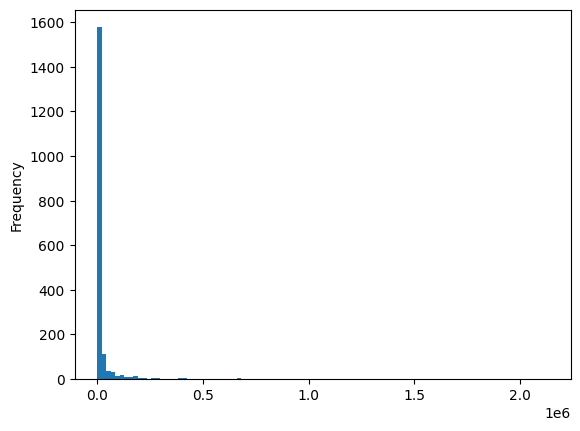

In [31]:
games_ratings = df_apple_cleaned_and_free[df_apple_cleaned_and_free["prime_genre"] == "Games"]["rating_count_tot"]
games_ratings.plot.hist(bins=100)

We can also plot histograms for several genres in one go. First, we need to select the genres we want to plot. This can be done using `str.contains` and a basic regex (can this done better, using categories?).

array([<Axes: title={'center': 'Games'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Music'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Navigation'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Reference'}, ylabel='Frequency'>,
       <Axes: title={'center': 'Social Networking'}, ylabel='Frequency'>],
      dtype=object)

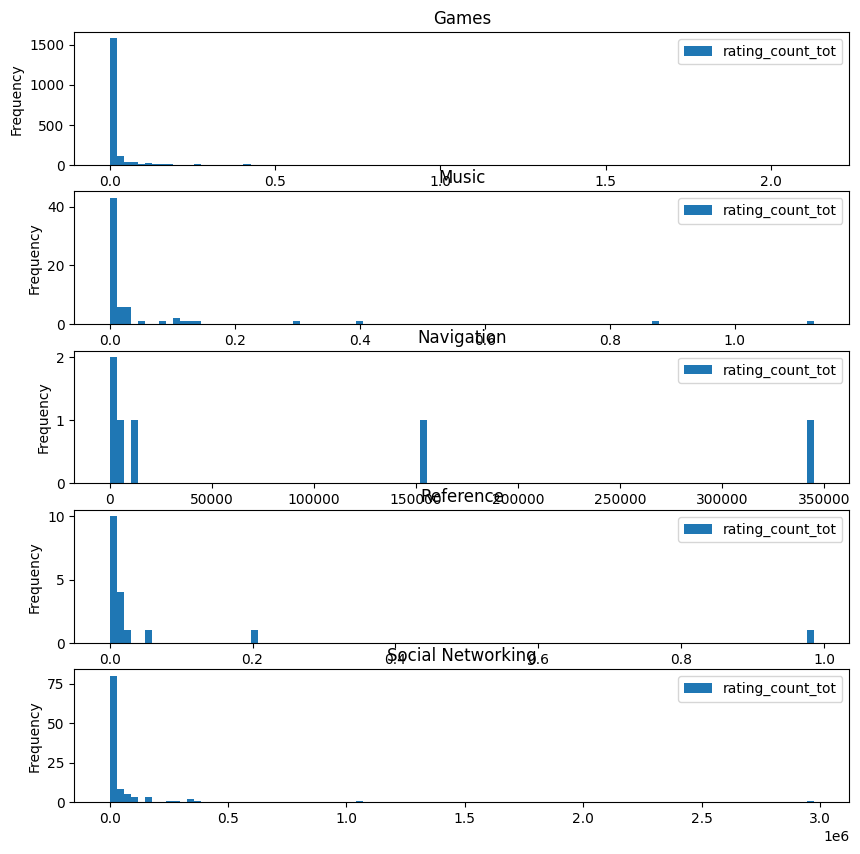

In [32]:
genres_to_plot = ["Games", "Navigation", "Reference", "Social Networking", "Music"]
regex = "|".join(genres_to_plot)
indicator = df_apple_cleaned_and_free["prime_genre"].str.contains(regex)
df_apple_zoomin = df_apple_cleaned_and_free[indicator]
df_apple_zoomin[["prime_genre", "rating_count_tot"]].plot.hist(by="prime_genre", bins=100, figsize=(10, 10))

In [33]:
df_apple_zoomin["prime_genre"].value_counts()

prime_genre
Games                1874
Social Networking     106
Music                  66
Reference              18
Navigation              6
Name: count, dtype: int64

We see that the high average number of ratings for "Navigation" is a bit misleading: There are only 6 apps in that genre, one of which has close to 350000 ratings. On the other hand, there is a "Social Networking" app (Facebook) with close to 3M ratings, and a "Games" app with more than 2M ratings.

In [34]:
df_apple_zoomin.groupby("prime_genre")["rating_count_tot"].max()

prime_genre
Games                2130805
Music                1126879
Navigation            345046
Reference             985920
Social Networking    2974676
Name: rating_count_tot, dtype: int64

The following works because `drop_duplicates` by default keeps the first row for each unique value of "prime_genre" (in this case).

In [35]:
df_apple_zoomin.sort_values(["prime_genre", "rating_count_tot"], ascending=False).drop_duplicates("prime_genre")[["prime_genre", "track_name", "rating_count_tot"]]

,prime_genre,track_name,rating_count_tot
0,Social Networking,Facebook,2974676
6,Reference,Bible,985920
49,Navigation,"Waze - GPS Navigation, Maps & Real-time Traffic",345046
4,Music,Pandora - Music & Radio,1126879
2,Games,Clash of Clans,2130805


Given we are interested in introducing a new app into the AppStore, we want to discount genres where 1 or 2 massive players dominate, and everybody else struggles to get any number of ratings.

For the PlayStore data, we have the "Installs" column. This provides a lower bound on the number of installs, which we are going to use as a surrogate for the real number of installs.

In [36]:
df_android_cleaned_and_free.loc[:, "Installs2"] = df_android_cleaned_and_free["Installs"].str.replace("\,|\+", "", regex=True).astype("int64")
df_android_cleaned_and_free.head()

/var/folders/kj/trnztfjn67j9by8wztm_6y8m0000gn/T/ipykernel_81987/2991034315.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_android_cleaned_and_free.loc[:, "Installs2"] = df_android_cleaned_and_free["Installs"].str.replace("\,|\+", "", regex=True).astype("int64")


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Installs2
882,🔥 Football Wallpapers 4K | Full HD Backgrounds 😍,ENTERTAINMENT,4.7,11661,4.0M,"1,000,000+",Free,0,Everyone,Entertainment,"July 14, 2018",1.1.3.2,4.0.3 and up,1000000
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2M,"10,000+",Free,0,Everyone,Tools,"October 21, 2017",1.0,4.2 and up,10000
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18M,"1,000,000+",Free,0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up,1000000
313,"漫咖 Comics - Manga,Novel and Stories",COMICS,4.1,12088,21M,"1,000,000+",Free,0,Mature 17+,Comics,"July 6, 2018",2.3.1,4.0.3 and up,1000000
3824,乗換NAVITIME Timetable & Route Search in Japan T...,MAPS_AND_NAVIGATION,4.4,50459,Varies with device,"5,000,000+",Free,0,Everyone,Maps & Navigation,"July 26, 2018",Varies with device,Varies with device,5000000


In [37]:
df_android_cleaned_and_free.groupby("Category", observed=True)["Installs2"].mean().sort_values(ascending=False)

Category
COMMUNICATION          3.845612e+07
VIDEO_PLAYERS          2.472787e+07
SOCIAL                 2.325365e+07
PHOTOGRAPHY            1.784011e+07
PRODUCTIVITY           1.678733e+07
GAME                   1.558802e+07
TRAVEL_AND_LOCAL       1.398408e+07
ENTERTAINMENT          1.164071e+07
TOOLS                  1.080139e+07
NEWS_AND_MAGAZINES     9.549178e+06
BOOKS_AND_REFERENCE    8.767812e+06
SHOPPING               7.036877e+06
PERSONALIZATION        5.201483e+06
WEATHER                5.074486e+06
HEALTH_AND_FITNESS     4.188822e+06
MAPS_AND_NAVIGATION    4.056942e+06
FAMILY                 3.695642e+06
SPORTS                 3.638640e+06
ART_AND_DESIGN         1.986335e+06
FOOD_AND_DRINK         1.924898e+06
EDUCATION              1.833495e+06
BUSINESS               1.712290e+06
LIFESTYLE              1.437816e+06
FINANCE                1.387692e+06
HOUSE_AND_HOME         1.331541e+06
DATING                 8.540288e+05
COMICS                 8.176573e+05
AUTO_AND_VEHICLES  

In [38]:
freq_android_category.iloc[:8]

Category
FAMILY          0.189079
GAME            0.097247
TOOLS           0.084612
BUSINESS        0.045916
LIFESTYLE       0.039034
PRODUCTIVITY    0.038921
FINANCE         0.037004
MEDICAL         0.035311
Name: count, dtype: float64

In [39]:
cats_to_look_at = ["COMMUNICATION", "VIDEO_PLAYERS", "SOCIAL", "PHOTOGRAPHY", "PRODUCTIVITY", "GAME", "FAMILY", "TOOLS", "BOOKS_AND_REFERENCE"]
regex = "|".join(cats_to_look_at)
indicator = df_android_cleaned_and_free["Category"].str.contains(regex)
df_android_zoomin = df_android_cleaned_and_free[indicator]

In [40]:
set(df_android_zoomin["Category"])

{'BOOKS_AND_REFERENCE',
 'COMMUNICATION',
 'FAMILY',
 'GAME',
 'PHOTOGRAPHY',
 'PRODUCTIVITY',
 'SOCIAL',
 'TOOLS',
 'VIDEO_PLAYERS'}

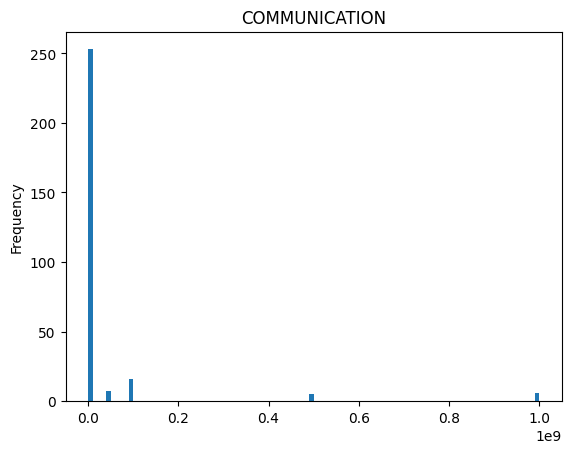

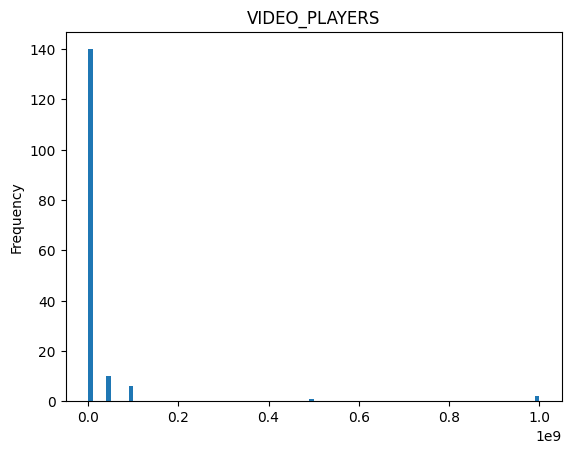

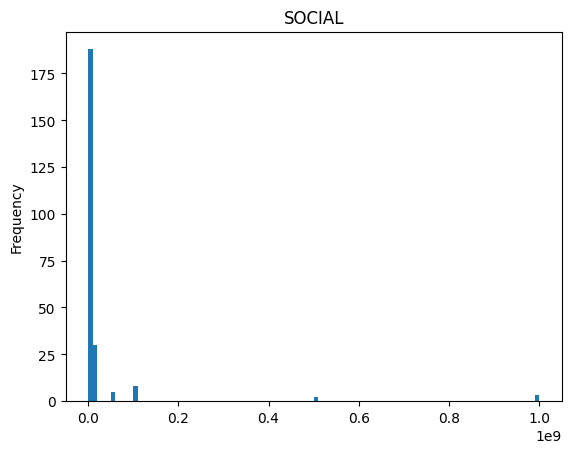

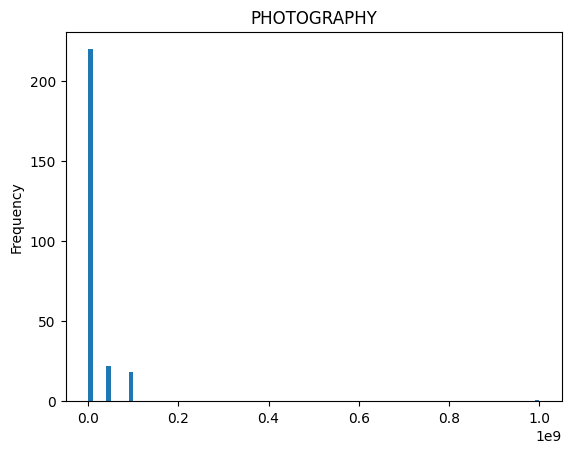

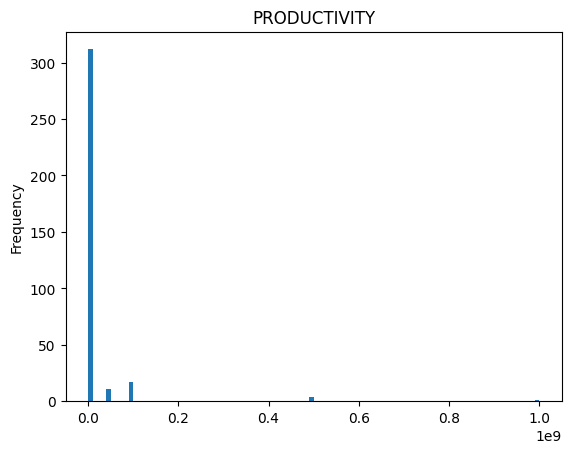

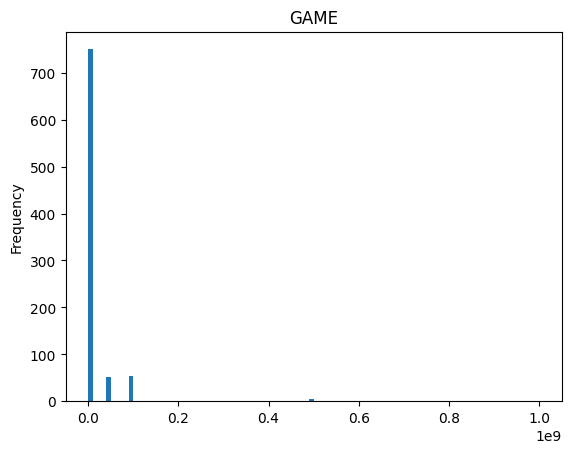

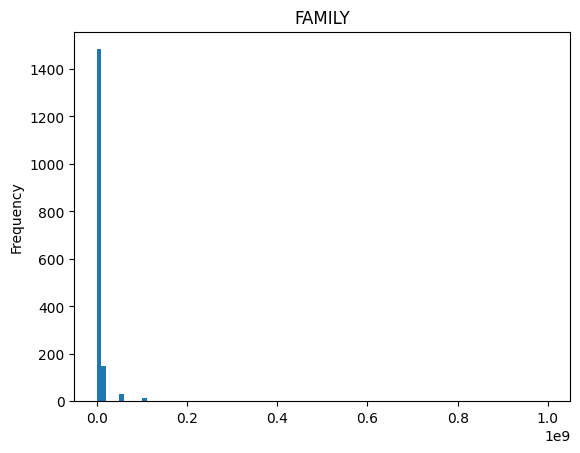

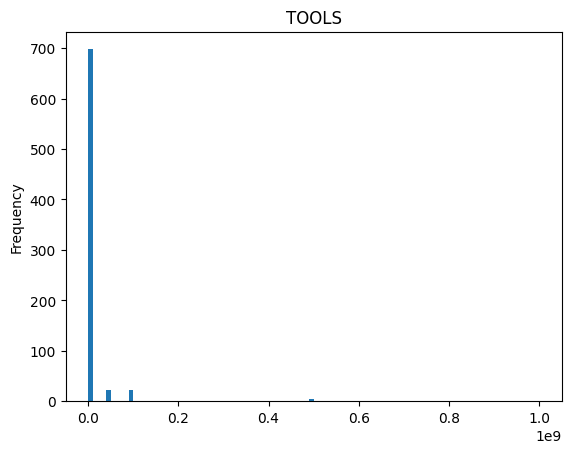

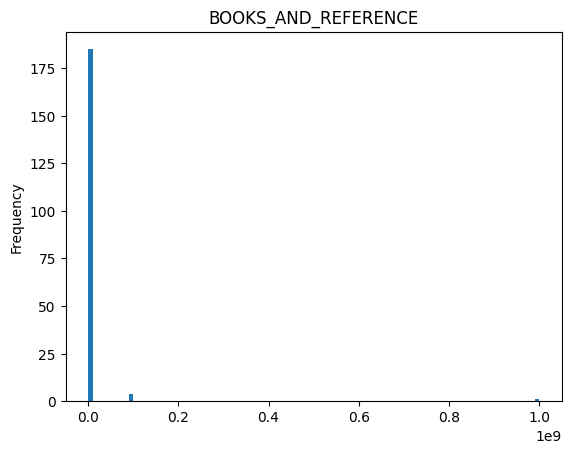

In [41]:
for name in cats_to_look_at:
    indic = df_android_zoomin["Category"] == name
    df_android_zoomin[indic]["Installs2"].plot.hist(bins=100, title=name)
    plt.show()


In [42]:
df_android_zoomin.sort_values(["Category", "Installs2"], ascending=False).drop_duplicates("Category")[["Category", "App", "Installs"]]

,Category,App,Installs
3665,VIDEO_PLAYERS,YouTube,"1,000,000,000+"
3234,TOOLS,Google,"1,000,000,000+"
2604,SOCIAL,Instagram,"1,000,000,000+"
3523,PRODUCTIVITY,Google Drive,"1,000,000,000+"
2884,PHOTOGRAPHY,Google Photos,"1,000,000,000+"
1872,GAME,Subway Surfers,"1,000,000,000+"
5856,FAMILY,Google Play Games,"1,000,000,000+"
336,COMMUNICATION,WhatsApp Messenger,"1,000,000,000+"
152,BOOKS_AND_REFERENCE,Google Play Books,"1,000,000,000+"


In [43]:
df_android_zoomin[df_android_zoomin["Category"] == "COMMUNICATION"].sort_values("Installs2", ascending=False)[["Category", "App", "Installs"]].head(20)

,Category,App,Installs
451,COMMUNICATION,Gmail,"1,000,000,000+"
464,COMMUNICATION,Hangouts,"1,000,000,000+"
411,COMMUNICATION,Google Chrome: Fast & Secure,"1,000,000,000+"
336,COMMUNICATION,WhatsApp Messenger,"1,000,000,000+"
382,COMMUNICATION,Messenger – Text and Video Chat for Free,"1,000,000,000+"
391,COMMUNICATION,Skype - free IM & video calls,"1,000,000,000+"
4676,COMMUNICATION,Viber Messenger,"500,000,000+"
420,COMMUNICATION,UC Browser - Fast Download Private & Secure,"500,000,000+"
403,COMMUNICATION,LINE: Free Calls & Messages,"500,000,000+"
371,COMMUNICATION,Google Duo - High Quality Video Calls,"500,000,000+"


In [44]:
df_android_zoomin[df_android_zoomin["Category"] == "VIDEO_PLAYERS"].sort_values("Installs2", ascending=False)[["Category", "App", "Installs"]].head(20)

,Category,App,Installs
3687,VIDEO_PLAYERS,Google Play Movies & TV,"1,000,000,000+"
3665,VIDEO_PLAYERS,YouTube,"1,000,000,000+"
3711,VIDEO_PLAYERS,MX Player,"500,000,000+"
3672,VIDEO_PLAYERS,Motorola Gallery,"100,000,000+"
3675,VIDEO_PLAYERS,VLC for Android,"100,000,000+"
4696,VIDEO_PLAYERS,"VideoShow-Video Editor, Video Maker, Beauty Ca...","100,000,000+"
4688,VIDEO_PLAYERS,VivaVideo - Video Editor & Photo Movie,"100,000,000+"
4032,VIDEO_PLAYERS,Dubsmash,"100,000,000+"
10647,VIDEO_PLAYERS,Motorola FM Radio,"100,000,000+"
3693,VIDEO_PLAYERS,LIKE – Magic Video Maker & Community,"50,000,000+"


In [45]:
df_android_zoomin[df_android_zoomin["Category"] == "SOCIAL"].sort_values("Installs2", ascending=False)[["Category", "App", "Installs"]].head(20)

,Category,App,Installs
2544,SOCIAL,Facebook,"1,000,000,000+"
2554,SOCIAL,Google+,"1,000,000,000+"
2604,SOCIAL,Instagram,"1,000,000,000+"
2546,SOCIAL,Facebook Lite,"500,000,000+"
2610,SOCIAL,Snapchat,"500,000,000+"
3945,SOCIAL,Tik Tok - including musical.ly,"100,000,000+"
2588,SOCIAL,Badoo - Free Chat & Dating App,"100,000,000+"
2552,SOCIAL,Pinterest,"100,000,000+"
2548,SOCIAL,Tumblr,"100,000,000+"
2592,SOCIAL,Tango - Live Video Broadcast,"100,000,000+"


In [46]:
df_android_zoomin[df_android_zoomin["Category"] == "PHOTOGRAPHY"].sort_values("Installs2", ascending=False)[["Category", "App", "Installs"]].head(20)

,Category,App,Installs
2884,PHOTOGRAPHY,Google Photos,"1,000,000,000+"
2816,PHOTOGRAPHY,B612 - Beauty & Filter Camera,"100,000,000+"
2939,PHOTOGRAPHY,Photo Collage Editor,"100,000,000+"
2847,PHOTOGRAPHY,"Sweet Selfie - selfie camera, beauty cam, phot...","100,000,000+"
10707,PHOTOGRAPHY,Photo Editor Collage Maker Pro,"100,000,000+"
4574,PHOTOGRAPHY,"S Photo Editor - Collage Maker , Photo Collage","100,000,000+"
2908,PHOTOGRAPHY,Retrica,"100,000,000+"
2944,PHOTOGRAPHY,"Candy Camera - selfie, beauty camera, photo ed...","100,000,000+"
2921,PHOTOGRAPHY,Photo Editor Pro,"100,000,000+"
2937,PHOTOGRAPHY,BeautyPlus - Easy Photo Editor & Selfie Camera,"100,000,000+"


In [47]:
df_android_zoomin[df_android_zoomin["Category"] == "GAME"].sort_values("Installs2", ascending=False)[["Category", "App", "Installs"]].head(20)

,Category,App,Installs
1872,GAME,Subway Surfers,"1,000,000,000+"
1920,GAME,Temple Run 2,"500,000,000+"
1869,GAME,Candy Crush Saga,"500,000,000+"
1908,GAME,My Talking Tom,"500,000,000+"
1885,GAME,Pou,"500,000,000+"
1957,GAME,Bus Rush: Subway Edition,"100,000,000+"
1667,GAME,Sonic Dash,"100,000,000+"
4043,GAME,Vector,"100,000,000+"
2007,GAME,Jetpack Joyride,"100,000,000+"
4188,GAME,Geometry Dash Lite,"100,000,000+"


In [48]:
df_android_zoomin[df_android_zoomin["Category"] == "FAMILY"].sort_values("Installs2", ascending=False)[["Category", "App", "Installs"]].head(20)

,Category,App,Installs
5856,FAMILY,Google Play Games,"1,000,000,000+"
4797,FAMILY,Talking Tom & Ben News,"100,000,000+"
10186,FAMILY,Farm Heroes Saga,"100,000,000+"
4217,FAMILY,Talking Ginger,"100,000,000+"
6269,FAMILY,Bitmoji – Your Personal Emoji,"100,000,000+"
4247,FAMILY,Talking Tom Cat,"100,000,000+"
4111,FAMILY,Talking Tom Cat 2,"100,000,000+"
2206,FAMILY,ROBLOX,"100,000,000+"
3975,FAMILY,Hay Day,"100,000,000+"
2050,FAMILY,Minion Rush: Despicable Me Official Game,"100,000,000+"


In [49]:
df_android_zoomin[df_android_zoomin["Category"] == "BOOKS_AND_REFERENCE"].sort_values("Installs2", ascending=False)[["Category", "App", "Installs"]].head(20)

,Category,App,Installs
152,BOOKS_AND_REFERENCE,Google Play Books,"1,000,000,000+"
4715,BOOKS_AND_REFERENCE,Wattpad 📖 Free Books,"100,000,000+"
4083,BOOKS_AND_REFERENCE,Amazon Kindle,"100,000,000+"
5651,BOOKS_AND_REFERENCE,Audiobooks from Audible,"100,000,000+"
3941,BOOKS_AND_REFERENCE,Bible,"100,000,000+"
6296,BOOKS_AND_REFERENCE,English Dictionary - Offline,"10,000,000+"
9570,BOOKS_AND_REFERENCE,Spanish English Translator,"10,000,000+"
5345,BOOKS_AND_REFERENCE,Quran for Android,"10,000,000+"
179,BOOKS_AND_REFERENCE,Moon+ Reader,"10,000,000+"
9625,BOOKS_AND_REFERENCE,JW Library,"10,000,000+"


Among these categories, "PHOTOGRAPHY" and "VIDEO_PLAYERS" are maybe most attractive. Developing a good video player takes a lot of skills, but among the photography apps, there could be fairly simple ones. In "COMMUNICATION" and "SOCIAL", the big players dominate very much, and there are strong networking effects.

"FAMILY" are mostly games for kids, so could be merged with "GAME".

Also, among the 1B+ installs, many are Google apps which are installed by default. It is unclear how much these are actually used. Especially for free apps with in-app purchases, revenue cannot be deduced from installs.

"BOOKS_AND_REFERENCE" looks more penetrable. Again, the Google app is installed by default. Among the top 20, there is the Bible and Quran, dictionaries, and e-book reader apps.

We can look more closely at the middle range for "BOOKS_AND_REFERENCE". Such advanced queries are easily done using the `query` method.

In [50]:
df_android_zoomin.query("Category == 'BOOKS_AND_REFERENCE' and 1000000 <= Installs2 < 100000000").sort_values("Installs2", ascending=False)[["App", "Installs"]]

,App,Installs
9643,English Hindi Dictionary,"10,000,000+"
6497,NOOK: Read eBooks & Magazines,"10,000,000+"
6290,Dictionary.com: Find Definitions for English W...,"10,000,000+"
149,FBReader: Favorite Book Reader,"10,000,000+"
9621,Dictionary - Merriam-Webster,"10,000,000+"
8293,Dictionary,"10,000,000+"
144,Cool Reader,"10,000,000+"
173,HTC Help,"10,000,000+"
9625,JW Library,"10,000,000+"
179,Moon+ Reader,"10,000,000+"
